In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
tickers = ['BHP']

In [4]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url=url, headers={'user-agent': 'student'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table


In [5]:
news_tables

{'BHP': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" width="130">Oct-07-22 02:06AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/bhp-plan-keep-coal-mine-012352326.html" target="_blank">BHPs Plan to Keep Coal Mine Open for 93 Years Delusional</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Bloomberg</span></div></div></td></tr>
 <tr><td align="right" width="130">Oct-05-22 02:45AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/1-pavilion-energy-mitsui-o-064533559.html" target="_blank">UPDATE 1-Pavilion Energy, Mitsui O.S.K to launch LNG bunker vessel in Q1 2023</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Reuters</span></div></div></td></tr>
 <

In [6]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'): #to look for date and time data
        
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
    

In [7]:
parsed_data

[['BHP',
  'Oct-07-22',
  '02:06AM',
  'BHPs Plan to Keep Coal Mine Open for 93 Years Delusional'],
 ['BHP',
  'Oct-05-22',
  '02:45AM',
  'UPDATE 1-Pavilion Energy, Mitsui O.S.K to launch LNG bunker vessel in Q1 2023'],
 ['BHP',
  'Oct-04-22',
  '10:37PM',
  'Should You Be Adding BHP Group (ASX:BHP) To Your Watchlist Today?'],
 ['BHP',
  'Oct-04-22',
  '06:17AM',
  "World's Largest Miner Aims To Boost Its Green Credentials - Read How"],
 ['BHP',
  'Oct-04-22',
  '12:14AM',
  'BHP to receive 3 more LNG-fuelled bulk carriers in next 6-9 mths - exec'],
 ['BHP',
  'Oct-03-22',
  '04:03AM',
  'BHP lifts steel consumption forecast on surging demand from renewable power farms'],
 ['BHP', 'Sep-28-22', '12:59PM', '7 Best Precious Metals Stocks to Buy Now'],
 ['BHP',
  'Sep-28-22',
  '08:35AM',
  'BHP Sees Chile Uncertainties Easing in Investment Climate Boost'],
 ['BHP',
  'Sep-27-22',
  '12:40PM',
  '10 Best Materials Stocks to Buy After Feds Latest Rate Hike'],
 ['BHP',
  'Sep-26-22',
  '02:

In [8]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [9]:
df

,ticker,date,time,title
0,BHP,Oct-07-22,02:06AM,BHPs Plan to Keep Coal Mine Open for 93 Years ...
1,BHP,Oct-05-22,02:45AM,"UPDATE 1-Pavilion Energy, Mitsui O.S.K to laun..."
2,BHP,Oct-04-22,10:37PM,Should You Be Adding BHP Group (ASX:BHP) To Yo...
3,BHP,Oct-04-22,06:17AM,World's Largest Miner Aims To Boost Its Green ...
4,BHP,Oct-04-22,12:14AM,BHP to receive 3 more LNG-fuelled bulk carrier...
...,...,...,...,...
95,BHP,Jun-14-22,08:35AM,"Samarco, creditors to discuss restructuring pr..."
96,BHP,Jun-13-22,01:34PM,UPDATE 2-BHP open to potash partner but plans ...
97,BHP,Jun-13-22,12:34PM,Canada to invest up to C$100 million in low-em...
98,BHP,Jun-13-22,12:34PM,BHP open to potash partner but plans to enter ...


In [10]:
vader = SentimentIntensityAnalyzer()

In [11]:
f = lambda title: vader.polarity_scores(title)['compound']

In [12]:
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [13]:
df

,ticker,date,time,title,compound
0,BHP,2022-10-07,02:06AM,BHPs Plan to Keep Coal Mine Open for 93 Years ...,0.0000
1,BHP,2022-10-05,02:45AM,"UPDATE 1-Pavilion Energy, Mitsui O.S.K to laun...",0.2732
2,BHP,2022-10-04,10:37PM,Should You Be Adding BHP Group (ASX:BHP) To Yo...,0.0000
3,BHP,2022-10-04,06:17AM,World's Largest Miner Aims To Boost Its Green ...,0.4019
4,BHP,2022-10-04,12:14AM,BHP to receive 3 more LNG-fuelled bulk carrier...,0.0000
...,...,...,...,...,...
95,BHP,2022-06-14,08:35AM,"Samarco, creditors to discuss restructuring pr...",0.0000
96,BHP,2022-06-13,01:34PM,UPDATE 2-BHP open to potash partner but plans ...,-0.3612
97,BHP,2022-06-13,12:34PM,Canada to invest up to C$100 million in low-em...,0.0000
98,BHP,2022-06-13,12:34PM,BHP open to potash partner but plans to enter ...,-0.3612


In [14]:
df_mean = df.groupby(['ticker', 'date']).mean()
df_mean = df_mean.unstack()

In [15]:
df_mean

compound                                                         \
date   2022-06-12 2022-06-13 2022-06-14 2022-06-15 2022-06-16 2022-06-17   
ticker                                                                     
BHP       -0.2732    -0.2408    -0.3062        0.0    0.25445     0.2732   

                                                    ...                        \
date   2022-06-20 2022-06-22 2022-06-25 2022-06-28  ... 2022-09-22 2022-09-23   
ticker                                              ...                         
BHP      0.025733        0.0        0.0   0.113333  ...    0.10115     0.5292   

                                                                          \
date   2022-09-25 2022-09-26 2022-09-27 2022-09-28 2022-10-03 2022-10-04   
ticker                                                                     
BHP           0.0        0.0     0.6369     0.5771     -0.128   0.133967   

                              
date   2022-10-05 2022-10-07  
ticker                        
BHP        0.2732        0.0  

[1 rows x 54 columns]

In [16]:
df_mean = df_mean.xs('compound', axis="columns").transpose()

In [17]:
df_mean.head()

ticker,BHP
date,
2022-06-12,-0.27320
2022-06-13,-0.24080
2022-06-14,-0.30620
2022-06-15,0.00000
2022-06-16,0.25445


In [18]:
df_mean.tail()

ticker,BHP
date,
2022-09-28,0.577100
2022-10-03,-0.128000
2022-10-04,0.133967
2022-10-05,0.273200
2022-10-07,0.000000


<Figure size 1008x720 with 0 Axes>

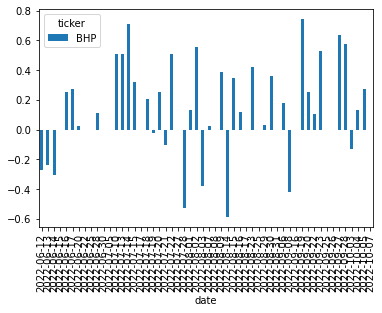

In [19]:
plt.figure(figsize=(14,10))
df_mean.plot(kind='bar')
plt.show()

In [20]:
len(df_mean)

54

In [21]:
bhp = pd.read_excel('BHP.AX.xls')

In [22]:
bhp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-14,43.500000,44.259998,43.160000,44.259998,41.478119,15865363
1,2022-06-15,43.869999,44.590000,43.720001,43.900002,41.140747,11754602
2,2022-06-16,44.480000,44.680000,43.849998,44.009998,41.243832,12499017
3,2022-06-17,42.889999,43.049999,42.070000,42.520000,39.847485,26704392
4,2022-06-20,42.160000,42.180000,40.160000,40.259998,37.729530,11338323
...,...,...,...,...,...,...,...
79,2022-10-04,39.650002,40.150002,39.369999,40.070000,40.070000,11311429
80,2022-10-05,40.810001,40.830002,40.029999,40.500000,40.500000,12182066
81,2022-10-06,40.490002,40.830002,40.209999,40.759998,40.759998,8714047
82,2022-10-07,40.270000,40.570000,40.060001,40.060001,40.060001,7933706


In [23]:
df_mean.shape

(54, 1)

In [25]:
bhp.columns = bhp.columns.str.lower()

In [26]:
bhp['date'] = pd.to_datetime(df.date).dt.date

In [27]:
bhp

,date,open,high,low,close,adj close,volume
0,2022-10-07,43.500000,44.259998,43.160000,44.259998,41.478119,15865363
1,2022-10-05,43.869999,44.590000,43.720001,43.900002,41.140747,11754602
2,2022-10-04,44.480000,44.680000,43.849998,44.009998,41.243832,12499017
3,2022-10-04,42.889999,43.049999,42.070000,42.520000,39.847485,26704392
4,2022-10-04,42.160000,42.180000,40.160000,40.259998,37.729530,11338323
...,...,...,...,...,...,...,...
79,2022-07-10,39.650002,40.150002,39.369999,40.070000,40.070000,11311429
80,2022-07-05,40.810001,40.830002,40.029999,40.500000,40.500000,12182066
81,2022-06-30,40.490002,40.830002,40.209999,40.759998,40.759998,8714047
82,2022-06-28,40.270000,40.570000,40.060001,40.060001,40.060001,7933706


In [52]:
dfm = df_mean.copy()
dfm.to_csv(index=True)

'date,BHP\n2022-06-12,-0.2732\n2022-06-13,-0.24080000000000001\n2022-06-14,-0.3062\n2022-06-15,0.0\n2022-06-16,0.25444999999999995\n2022-06-17,0.2732\n2022-06-20,0.025733333333333334\n2022-06-22,0.0\n2022-06-25,0.0\n2022-06-28,0.11333333333333334\n2022-06-30,0.0\n2022-07-05,0.0\n2022-07-10,0.5106\n2022-07-13,0.5106\n2022-07-14,0.7096\n2022-07-15,0.3182\n2022-07-17,0.0\n2022-07-18,0.2023\n2022-07-19,-0.0258\n2022-07-20,0.2518666666666667\n2022-07-21,-0.1027\n2022-07-22,0.5106\n2022-07-27,0.0\n2022-07-28,-0.5267\n2022-08-01,0.128\n2022-08-02,0.5574\n2022-08-03,-0.3818\n2022-08-07,0.022999999999999993\n2022-08-08,0.0\n2022-08-09,0.383725\n2022-08-14,-0.5859\n2022-08-15,0.34395\n2022-08-16,0.11642\n2022-08-17,0.0\n2022-08-23,0.4201\n2022-08-25,0.0\n2022-08-29,0.033466666666666665\n2022-08-30,0.35705\n2022-08-31,0.0\n2022-09-06,0.1779\n2022-09-08,-0.4215\n2022-09-16,0.0\n2022-09-19,0.743\n2022-09-20,0.24939999999999998\n2022-09-22,0.10115\n2022-09-23,0.5292\n2022-09-25,0.0\n2022-09-26,0.0\n

In [44]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 2022-06-12 to 2022-10-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BHP     54 non-null     float64
dtypes: float64(1)
memory usage: 2.9+ KB


In [57]:
import requests
import re

In [54]:
monitored_tickers = ['BHP', 'CBA']

In [58]:
def search_for_stock_news_links(ticker):
    search_url = 'https://en.wikipedia.org/wiki/2021_in_Australia'.format(ticker)
    r = requests.get(search_url)
    soup = BeautifulSoup(r.text, 'html.parser')
    atags = soup.find_all('a')
    hrefs = [link['href'] for link in atags]
    return hrefs

In [59]:
raw_urls = {ticker:search_for_stock_news_links(ticker) for ticker in monitored_tickers}

In [60]:
raw_urls

{'BHP': ['/?sa=X&ved=0ahUKEwjjyNnW29D6AhXaLUQIHWI4DR8QOwgC',
  '/search?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&ie=UTF-8&gbv=1&sei=GXhBY6PYK9rbkPIP4vC0-AE',
  '/search?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&ie=UTF-8&source=lnms&tbm=nws&sa=X&ved=0ahUKEwjjyNnW29D6AhXaLUQIHWI4DR8Q_AUIBigB',
  '/search?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&ie=UTF-8&source=lnms&tbm=shop&sa=X&ved=0ahUKEwjjyNnW29D6AhXaLUQIHWI4DR8Q_AUIBygC',
  '/search?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&ie=UTF-8&source=lnms&tbm=bks&sa=X&ved=0ahUKEwjjyNnW29D6AhXaLUQIHWI4DR8Q_AUICCgD',
  '/search?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&ie=UTF-8&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjjyNnW29D6AhXaLUQIHWI4DR8Q_AUICSgE',
  'https://maps.google.com/maps?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&sxsrf=ALiCzsZNghQUvE0tIk_&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjjyNnW29D6AhXaLUQIHWI4DR8Q_AUICigF',
  '/search?q=yahoo+finance+news&rlz=1C5CHFA_enAU1020AU1020&ie=UTF-8&source=lnms&tbm=vid&sa=X&ved

In [61]:
print('Cleaning URLs.')
exclude_list = ['maps', 'policies', 'preferences', 'accounts', 'support']
def strip_unwanted_urls(urls, exclude_list):
    val = []
    for url in urls:
        if 'https://' in url and not any(exc in url for exc in exclude_list):
            res = re.findall(r'(https?://\S+)', url)[0].split('&')[0]
            val.append(res)
    return list(set(val))

 

Cleaning URLs.


In [62]:
cleaned_urls = {ticker:strip_unwanted_urls(raw_urls[ticker] , exclude_list) for ticker in monitored_tickers}

In [63]:
print('Scraping news links.')
def scrape_and_process(URLs):
    ARTICLES = []
    for url in URLs:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        results = soup.find_all('p')
        text = [res.text for res in results]
        words = ' '.join(text).split(' ')[:350]
        ARTICLE = ' '.join(words)
        ARTICLES.append(ARTICLE)
    return ARTICLES

Scraping news links.


In [64]:
articles = {ticker:scrape_and_process(cleaned_urls[ticker]) for ticker in monitored_tickers} 

In [65]:
articles

{'BHP': ['',
  "Get Fully Briefed with Yahoo Finance, delivered straight to your inbox. Insigneo CIO Ahmed Riesgo and Todd Sohn, Managing Director of Technical Strategy at Strategas, a Baird company, join Yahoo Finance Live to discuss the market outlook amid the Fed's interest rate hikes and recent employment data, and also talk about trading in volatile or recessionary periods. RACHELLE AKUFFO: Well, let's take a closer look at those border markets with our markets panel. Let's bring in Ahmed Riesgo, Insignia chief investment officer, and Todd Sohn, Strategas managing director of technical strategy. A big welcome to you both. So Ahmed, I first want to start with you, getting your reaction to where we are in terms of what we're seeing with this market rally. Obviously, this came off of the bad news that we got in the jobs market. So now we have another swing in the opposite direction. AHMED RIESGO: Right, so really, I think the market's not going to be able to rally here in any sustain

In [67]:
from transformers import PegasusTokenizer, PegasusForConditionalGeneration
from transformers import pipeline

In [70]:
# 2. Setup Model
model_name = "human-centered-summarization/financial-summarization-pegasus"


In [71]:
tokenizer = PegasusTokenizer.from_pretrained(model_name)

TypeError: 'NoneType' object is not callable

In [ ]:
model = PegasusForConditionalGeneration.from_pretrained(model_name)

In [72]:
newdf = pd.DataFrame(articles)

In [75]:
newdf

,BHP,CBA
0,,
1,"Get Fully Briefed with Yahoo Finance, delivere...","Get Fully Briefed with Yahoo Finance, delivere..."
2,Thank you for your patience. Our engineers are...,Thank you for your patience. Our engineers are...
3,404. That’s an error.The requested URL was not...,404. That’s an error.The requested URL was not...
4,We are experiencing some temporary issues. The...,We are experiencing some temporary issues. The...
5,Yahoo Finance marks one-year since COVID-19 di...,Yahoo Finance marks one-year since COVID-19 di...
6,"Get Fully Briefed with Yahoo Finance, delivere...","Get Fully Briefed with Yahoo Finance, delivere..."
7,"Get Fully Briefed with Yahoo Finance, delivere...","Get Fully Briefed with Yahoo Finance, delivere..."
8,Thank you for your patience. Our engineers are...,Thank you for your patience. Our engineers are...
9,Thank you for your patience. Our engineers are...,Thank you for your patience. Our engineers are...


In [76]:
newdf['compound_bhp'] = newdf['BHP'].apply(f)

In [78]:
newdf['compound_cba'] = newdf['CBA'].apply(f)

In [79]:
newdf

,BHP,CBA,compound_bhp,compound_cba
0,,,0.0000,0.0000
1,"Get Fully Briefed with Yahoo Finance, delivere...","Get Fully Briefed with Yahoo Finance, delivere...",0.9650,0.9650
2,Thank you for your patience. Our engineers are...,Thank you for your patience. Our engineers are...,0.6249,0.6249
3,404. That’s an error.The requested URL was not...,404. That’s an error.The requested URL was not...,0.0000,0.0000
4,We are experiencing some temporary issues. The...,We are experiencing some temporary issues. The...,-0.9412,-0.9412
5,Yahoo Finance marks one-year since COVID-19 di...,Yahoo Finance marks one-year since COVID-19 di...,0.9349,0.9349
6,"Get Fully Briefed with Yahoo Finance, delivere...","Get Fully Briefed with Yahoo Finance, delivere...",0.9626,0.9626
7,"Get Fully Briefed with Yahoo Finance, delivere...","Get Fully Briefed with Yahoo Finance, delivere...",0.9246,0.9246
8,Thank you for your patience. Our engineers are...,Thank you for your patience. Our engineers are...,0.6249,0.6249
9,Thank you for your patience. Our engineers are...,Thank you for your patience. Our engineers are...,0.6249,0.6249
